# Tarea 3 de Inteligencia Artificial - Diego Pastrian & Ignacio Medina

En este documento se explora un enfoque dentro del campo de las redes neuronales artificiales (ANN): las ***Kolmogorov-Arnold Networks (KAN)***. El principal objetivo es implementar esta arquitectura siguiendo el tutorial presente en la página [A from scratch implementation of kolmogorov arnold networks (KAN).](https://mlwithouttears.com/2024/05/15/a-from-scratch-implementation-of-kolmogorov-arnold-networks-kan/).

## Item 1. Implementación del Tutorial.


### Implementación.
La primera actividad a realizar es la implementación del algoritmo KAN.



*   El input de la neurona ***xin*** se representa por $\mathbf{x}^{\text{in}} = [x^{\text{in}}_1, \dots, x^{\text{in}}_M]$, donde las neuronas tienen ***n_in*** inputs los cuales a través de la neurona sufrirán una transformación intermedia $\phi(x^{\text{in}}_i,w^i)$.

*   De lo anterior, $x^{\text{mid}}_i = \phi(x^{\text{in}}_i, \mathbf{w}^i)$ representa a la salida intermedia en la neurona (***xmid*** en código). $\mathbf{w}^i = [w^i_1, \dots, w^i_K]$ son los pesos ***weights***, estos indican la importancia de la conexión entre una neurona y otra. Los pesos se inicializan con valores aleatorios entre -1 y 1.

*   El sesgo $b$, representado en el código por ***bias*** sirve para ajustar el resultado obtenido. Se inicializa en 0 y se ajusta con el entrenamiento del modelo.

*   Se tiene una salida ***xout***, que sería el resultado de salida de la neurona.

*   Desde la salida de la red hacia las capas anteriores (retropropagación) se reajustan los pesos $W^i$ y el sesgo $b$ minimizando la pérdida $\mathcal{L}$ (Que mide la diferencia entre las predicciones del modelo y los valores reales) con el método del gradiente descendiente. Para esto:
      *  Se utiliza la regla de la cadena para descomponer las derivadas en partes manejables en una neurona individual.
      \$[
\frac{\partial \mathcal{L}}{\partial b} = \frac{\partial \mathcal{L}}{\partial x^{\text{out}}} \cdot \frac{\partial x^{\text{out}}}{\partial b}.
\$]
\$[
\frac{\partial \mathcal{L}}{\partial w^i_j} = \frac{\partial \mathcal{L}}{\partial x^{\text{out}}} \cdot \frac{\partial x^{\text{out}}}{\partial w^i_j}, \quad \forall i, j.
\$]
      *   De lo anterior, se puede calcular $\( \frac{\partial x^{\text{out}}}{\partial b} \)$ y $\( \frac{\partial x^{\text{out}}}{\partial w^i_j} \)$ con las variables internas a la neurona.


In [ ]:
import numpy as np

class Neuron:

    def __init__(self, n_in, n_weights_per_edge, weights_range=None):
        self.n_in = n_in  # n. inputs
        self.n_weights_per_edge = n_weights_per_edge
        weights_range = [-1, 1] if weights_range is None else weights_range
        self.weights = np.random.uniform(weights_range[0], weights_range[-1], size=(self.n_in, self.n_weights_per_edge))
        self.bias = 0
        self.xin = None  # input variable
        self.xmid = None  # edge variables
        self.xout = None  # output variable
        self.dxout_dxmid = None  # derivative d xout / d xmid: (n_in, )
        self.dxout_dbias = None  # derivative d xout / d bias
        self.dxmid_dw = None  # derivative d xmid / d w: (n_in, n_par_per_edge)
        self.dxmid_dxin = None  # derivative d xmid / d xin
        self.dxout_dxin = None  # (composite) derivative d xout / d xin
        self.dxout_dw = None  # (composite) derivative d xout / d w
        self.dloss_dw = np.zeros((self.n_in, self.n_weights_per_edge))  # (composite) derivative d loss / d w
        self.dloss_dbias = 0  # (composite) derivative d loss / d bias

    def __call__(self, xin):
        # forward pass: compute neuron's output
        self.xin = np.array(xin)
        self.get_xmid()
        self.get_xout()

        # compute internal derivatives
        self.get_dxout_dxmid()
        self.get_dxout_dbias()
        self.get_dxmid_dw()
        self.get_dxmid_dxin()

        assert self.dxout_dxmid.shape == (self.n_in, )
        assert self.dxmid_dxin.shape == (self.n_in, )
        assert self.dxmid_dw.shape == (self.n_in, self.n_weights_per_edge)

        # compute external derivatives
        self.get_dxout_dxin()
        self.get_dxout_dw()

        return self.xout

    def get_xmid(self):
        # compute self.xmid
        pass

    def get_xout(self):
        # compute self.xout
        pass

    def get_dxout_dxmid(self):
        # compute self.dxout_dxmid
        pass

    def get_dxout_dbias(self):
        # compute self.dxout_dbias
        pass  #self.dxout_dbias = 0  # by default

    def get_dxmid_dw(self):
        # compute self.dxmid_dw
        pass

    def get_dxmid_dxin(self):
        # compute self.dxmid_dxin
        pass

    def get_dxout_dxin(self):
        self.dxout_dxin = self.dxout_dxmid * self.dxmid_dxin

    def get_dxout_dw(self):
        self.dxout_dw = np.diag(self.dxout_dxmid) @ self.dxmid_dw

    def update_dloss_dw_dbias(self, dloss_dxout):
        self.dloss_dw += self.dxout_dw * dloss_dxout
        self.dloss_dbias += self.dxout_dbias * dloss_dxout

    def gradient_descent(self, eps):
        self.weights -= eps * self.dloss_dw
        self.bias -= eps * self.dloss_dbias



La función de activación $\sigma$ puede estar dada por las funciones:


*   ***relu*** : Función ReLU
  $$
  \sigma(x) =
  \begin{cases}
  0, & \text{si } x \leq 0 \\
  x, & \text{si } x > 0
  \end{cases}
  $$
    

*   ***tanh_act***: Función Tangente hiperbólica $$σ(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$
*   ***sigmoid_act***: Función sigmoide $$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Estas funciones son esenciales para introducir no linealidad al modelo, permitiendo que la red neuronal pueda aprender relaciones complejas entre las entradas y salidas. Para KAN, estas aseguran que las transformaciones entre las capas sean flexibles para descomponer y aproximar funciones continuas.


In [ ]:
import math

def relu(x, get_derivative=False):
    return x * (x > 0) if not get_derivative else 1.0 * (x >= 0)

def tanh_act(x, get_derivative=False):
    if not get_derivative:
        return math.tanh(x)
    return 1 - math.tanh(x) ** 2

def sigmoid_act(x, get_derivative=False):
    if not get_derivative:
        return 1 / (1 + math.exp(-x))
    return sigmoid_act(x) * (1 - sigmoid_act(x))

A continuación se implementa la clase ***NeuronNN***, que corresponde a una neurona más general en el contexto de redes neuronales, heredando la clase ***Neuron*** para el cálculo de los valores intermedios $x^{mid}$ y finales $x^{out}$ de una neurona, además el cálculo de las derivadas auxiliares necesarias para la retropropagación.


*   Se calcula la salida intermedia ***xmid*** como el producto elemento a elemento entre las entradas ***xin*** por sus correspondientes pesos ***weight***.
*   Se calcula ***xout*** con la función de activación evaluada en las salidas intermedias y el sesgo $b$.
$ x^{\text{out}} = \sigma\left(\mathbf{x}^{\text{mid}}, b\right) := \sigma\left(b + \sum_{i=1}^M x^{\text{mid}}_i\right)$, siendo $\sigma$ la función de activación, la cual se debe definir en la inicialización.
*   Para ajustar los parámetros como el sesgo $b$ y los pesos $w$, se implementan funciones para el cálculo de las derivadas parciales de la salida $x^{out}$ con respecto a $x^{mid}$.



In [ ]:
class NeuronNN(Neuron):

    def __init__(self, n_in, weights_range=None, activation=relu):
        super().__init__(n_in, n_weights_per_edge=1, weights_range=weights_range)
        self.activation = activation
        self.activation_input = None

    def get_xmid(self):
        self.xmid = self.weights[:, 0] * self.xin

    def get_xout(self):
        self.activation_input = sum(self.xmid.flatten()) + self.bias
        self.xout = self.activation(self.activation_input, get_derivative=False)

    def get_dxout_dxmid(self):
        self.dxout_dxmid = self.activation(self.activation_input, get_derivative=True) * np.ones(self.n_in)

    def get_dxout_dbias(self):
        self.dxout_dbias = self.activation(self.activation_input, get_derivative=True)

    def get_dxmid_dw(self):
        self.dxmid_dw = np.reshape(self.xin, (-1, 1))

    def get_dxmid_dxin(self):
        self.dxmid_dxin = self.weights.flatten()

Lo particular de las redes Kolmogorov-Arnold es la utilización de la función de borde $\phi$. En el segmento de código posterior se define el uso de las funciones B-spline como las funciones 𝑓𝑘 en el borde, con la excepción de 𝑓1(𝑥), que se define como la función sigmoide modificada.
Las B-splines son funciones que se utilizan para representar funciones continuas de manera suave.

In [ ]:
from scipy.interpolate import BSpline

def get_bsplines(x_bounds, n_fun, degree=3, **kwargs):
    grid_len = n_fun - degree + 1
    step = (x_bounds[1] - x_bounds[0]) / (grid_len - 1)
    edge_fun, edge_fun_der = {}, {}

    # SiLU bias function
    edge_fun[0] = lambda x: x / (1 + np.exp(-x))
    edge_fun_der[0] = lambda x: (1 + np.exp(-x) + x * np.exp(-x)) / np.power((1 + np.exp(-x)), 2)

    # B-splines
    t = np.linspace(x_bounds[0] - degree * step, x_bounds[1] + degree * step, grid_len + 2 * degree)
    t[degree], t[-degree - 1] = x_bounds[0], x_bounds[1]
    for ind_spline in range(n_fun - 1):
        edge_fun[ind_spline + 1] = BSpline.basis_element(t[ind_spline:ind_spline + degree + 2], extrapolate=False)
        edge_fun_der[ind_spline + 1] = edge_fun[ind_spline + 1].derivative()
    return edge_fun, edge_fun_der


Se implementa la neurona ***NeuronKAN* que hereda de la clase ***Neuron***. Esta reemplaza el sesgo $b$ por el uso de las funciones borde $f_k$ ya explicadas anteriormente.

*   La salida intermedia ***xmid*** se calcula como una combianación lineal de las transformaciones univariadas $\phi(x)$, que son las funciones borde $f_k(w)$

*   La salida ***xout*** se obtiene con la aplicación de una tangente hiperbólica como función de activación sobre la suma de las salidas intermedias. Al utilizar $𝜎:= tanh$ como función de activación, se mantiene la variable de salida entre -1 y 1. Esto facilita el ajuste de las B-splines.

*   Para ajustar los pesos $w$, se implementan las derivadas necesarias a calcular.



In [ ]:
class NeuronKAN(Neuron):

    def __init__(self, n_in, n_weights_per_edge, x_bounds, weights_range=None, get_edge_fun=get_bsplines, **kwargs):
        self.x_bounds = x_bounds
        super().__init__(n_in, n_weights_per_edge=n_weights_per_edge, weights_range=weights_range)
        self.edge_fun, self.edge_fun_der = get_edge_fun(self.x_bounds, self.n_weights_per_edge, **kwargs)

    def get_xmid(self):
        # apply edge functions
        self.phi_x_mat = np.array([self.edge_fun[b](self.xin) for b in self.edge_fun]).T
        self.phi_x_mat[np.isnan(self.phi_x_mat)] = 0
        self.xmid = (self.weights * self.phi_x_mat).sum(axis=1)

    def get_xout(self):
        # note: node function <- tanh to avoid any update of spline grids
        self.xout = tanh_act(sum(self.xmid.flatten()), get_derivative=False)

    def get_dxout_dxmid(self):
        self.dxout_dxmid = tanh_act(sum(self.xmid.flatten()), get_derivative=True) * np.ones(self.n_in)

    def get_dxmid_dw(self):
        self.dxmid_dw = self.phi_x_mat

    def get_dxmid_dxin(self):
        phi_x_der_mat = np.array([self.edge_fun_der[b](self.xin) if self.edge_fun[b](self.xin) is not None else 0
                                  for b in self.edge_fun_der]).T  # shape (n_in, n_weights_per_edge)
        phi_x_der_mat[np.isnan(phi_x_der_mat)] = 0
        self.dxmid_dxin = (self.weights * phi_x_der_mat).sum(axis=1)

    def get_dxout_dbias(self):
        # no bias in KAN!
        self.dxout_dbias = 0

Una capa completamente conectada es una colección de neuronas, donde cada entrada se conecta a todas las neuronas de la capa siguiente. Cada conexión tiene un peso asignado. Para esto, se utiliza la clase llamada ***FullyConnectedLayer***. Esto asegura que todas las entradas influyan en todas las salidas, creando un modelo que capture relaciones complejas en los datos.


En una capa completamente conectada, una entrada $x_i$ afecta la pérdida total a partir de múltiples caminos, pues como se explicó anteriormente, $x_i$ influye en todas las salidas $y_j$ de la capa. Esto se representa por la siguiente derivada:
$$
\frac{\partial \mathcal{L}}{\partial x_i^{\text{in}}} = \sum_{n=1}^N \frac{\partial \mathcal{L}}{\partial x_n^{\text{out}}} \cdot \frac{\partial x_n^{\text{out}}}{\partial x_i^{\text{in}}}, \quad \forall i
$$
Donde $\frac{\partial \mathcal{L}}{\partial x_i^{\text{in}}}$ representa cómo la entrada $i$ afecta sobre la pérdida total, $\frac{\partial \mathcal{L}}{\partial x_n^{\text{out}}}$ cómo cada salida $j$ afecta sobre la pérdida total y $\frac{\partial x_n^{\text{out}}}{\partial x_i^{\text{in}}}$ cómo la entrada $i$ afecta sobre cada salida $j$. Con esto, se puede actualizar el gradiente de las entradas durante el back-propagation.




In [ ]:
class FullyConnectedLayer:

    def __init__(self, n_in, n_out, neuron_class=NeuronNN, **kwargs):
        self.n_in, self.n_out = n_in, n_out
        self.neurons = [neuron_class(n_in) if (kwargs == {}) else neuron_class(n_in, **kwargs) for _ in range(n_out)]
        self.xin = None  # input, shape (n_in,)
        self.xout = None  # output, shape (n_out,)
        self.dloss_dxin = None  # d loss / d xin, shape (n_in,)
        self.zero_grad()

    def __call__(self, xin):
        # forward pass
        self.xin = xin
        self.xout = np.array([nn(self.xin) for nn in self.neurons])
        return self.xout

    def zero_grad(self, which=None):
        # reset gradients to zero
        if which is None:
            which = ['xin', 'weights', 'bias']
        for w in which:
            if w == 'xin':  # reset layer's d loss / d xin
                self.dloss_dxin = np.zeros(self.n_in)
            elif w == 'weights':  # reset d loss / dw to zero for every neuron
                for nn in self.neurons:
                    nn.dloss_dw = np.zeros((self.n_in, self.neurons[0].n_weights_per_edge))
            elif w == 'bias':  # reset d loss / db to zero for every neuron
                for nn in self.neurons:
                    nn.dloss_dbias = 0
            else:
                raise ValueError('input \'which\' value not recognized')

    def update_grad(self, dloss_dxout):
        # update gradients by chain rule
        for ii, dloss_dxout_tmp in enumerate(dloss_dxout):
            # update layer's d loss / d xin via chain rule
            # note: account for all possible xin -> xout -> loss paths!
            self.dloss_dxin += self.neurons[ii].dxout_dxin * dloss_dxout_tmp
            # update neuron's d loss / dw and d loss / d bias
            self.neurons[ii].update_dloss_dw_dbias(dloss_dxout_tmp)
        return self.dloss_dxin

Sea ***y*** la salida de la última capa, es necesario calcular la pérdida para evaluar qué tan cerca está la predicción realizada respecto a las etiquetas reales $y^{train}$.

*   Para regresión se tiene la clase ***SquaredLosss***, que busca la pérdida se calcula mediante la diferencia cuadrática, midiendo distancia entre predicciones y valores reales.
*   Para clasificación se tiene la clase ***CrossEntropyLoss***, que utiliza la pérdida de entropía cruzada. Esto mide qué tan bien la red identifica la categoría correcta. Con esto, se busca que la probabilidad asociada a la clase correcta sea la más alta, utilizando el softmax en las salidas de la red.

La idea del cálculo de este error es ajustar los parametros de la red durante su entrenamiento.



In [ ]:
class Loss:

    def __init__(self, n_in):
        self.n_in = n_in
        self.y, self.dloss_dy, self.loss, self.y_train = None, None, None, None

    def __call__(self, y, y_train):
        # y: output of network
        # y_train: ground truth
        self.y, self.y_train = np.array(y), y_train
        self.get_loss()
        self.get_dloss_dy()
        return self.loss

    def get_loss(self):
        # compute loss l(y, y_train)
        pass

    def get_dloss_dy(self):
        # compute gradient of loss wrt y
        pass


class SquaredLoss(Loss):

    def get_loss(self):
        # compute loss l(xin, y)
        self.loss = np.mean(np.power(self.y - self.y_train, 2))

    def get_dloss_dy(self):
        # compute gradient of loss wrt xin
        self.dloss_dy = 2 * (self.y - self.y_train) / self.n_in


class CrossEntropyLoss(Loss):

    def get_loss(self):
        # compute loss l(xin, y)
        self.loss = - np.log(np.exp(self.y[self.y_train[0]]) / sum(np.exp(self.y)))

    def get_dloss_dy(self):
        # compute gradient of loss wrt xin
        self.dloss_dy = np.exp(self.y) / sum(np.exp(self.y))
        self.dloss_dy[self.y_train] -= 1

Finalmente, se finaliza apilando una cantidad arbitraria de capas para formar una red de propagación completamente conectada.

La clase ***FeedForward*** implementa una red neuronal de tipo feed-forward completamente conectada, permitiendo realizar el entrenamiento mediante pasos de propagación hacia adelante y retropropagación.


*   En la propagación hacia adelante, los datos de entrenamiento $x^{train}$ pasan a través de las capas de la red. Cada capa calcula sus salidas $x^{out}$.
*   En la retropropagación se calcula el gradiente de la pérdida
$$
\delta_i = \frac{\partial \mathcal{L}}{\partial x_i^{\text{in}}} = \sum_{n=1}^N \delta_n \cdot \frac{\partial x_n^{\text{out}}}{\partial x_i^{\text{in}}},
$$
donde $\delta_i$ se propaga desde la última capa hasta la primera.
*   El descenso por gradiente permite que los parámetros de la red se actualicen.$$
W_{ij} \gets W_{ij} - \epsilon \cdot \frac{\partial \mathcal{L}}{\partial W_{ij}}, \quad b_j \gets b_j - \epsilon \cdot \frac{\partial \mathcal{L}}{\partial b_j},
$$
$\epsilon$ corresponde a la tasa de aprendizaje, la cual permite controlar la dimensión de las actualizaciones a realizar.

*   En cada iteración, se computa la pérdida total $\mathcal{L}$ acumulada sobre todas las muestras de entrenamiento, y se ajustan los parámetros hasta alcanzar un criterio de convergencia o un número máximo de iteraciones.

In [ ]:
from tqdm import tqdm

class FeedForward:
    def __init__(self, layer_len, eps=.0001, seed=None, loss=SquaredLoss, **kwargs):
        self.seed = np.random.randint(int(1e4)) if seed is None else int(seed)
        np.random.seed(self.seed)
        self.layer_len = layer_len
        self.eps = eps
        self.n_layers = len(self.layer_len) - 1
        self.layers = [FullyConnectedLayer(layer_len[ii], layer_len[ii + 1], **kwargs) for ii in range(self.n_layers)]
        self.loss = loss(self.layer_len[-1])
        self.loss_hist = None

    def __call__(self, x):
        # forward pass
        x_in = x
        for ll in range(self.n_layers):
            x_in = self.layers[ll](x_in)
        return x_in

    def backprop(self):
        # gradient backpropagation
        delta = self.layers[-1].update_grad(self.loss.dloss_dy)
        for ll in range(self.n_layers - 1)[::-1]:
            delta = self.layers[ll].update_grad(delta)

    def gradient_descent_par(self):
        # update parameters via gradient descent
        for ll in self.layers:
            for nn in ll.neurons:
                nn.gradient_descent(self.eps)

    def train(self, x_train, y_train, n_iter_max=10000, loss_tol=.1):
        self.loss_hist = np.zeros(n_iter_max)
        x_train, y_train = np.array(x_train), np.array(y_train)
        assert x_train.shape[0] == y_train.shape[0], 'x_train, y_train must contain the same number of samples'
        assert x_train.shape[1] == self.layer_len[0], 'shape of x_train is incompatible with first layer'

        pbar = tqdm(range(n_iter_max))
        for it in pbar:
            loss = 0  # reset loss
            for ii in range(x_train.shape[0]):
                x_out = self(x_train[ii, :])  # forward pass
                loss += self.loss(x_out, y_train[ii, :])  # accumulate loss
                self.backprop()  # backward propagation
                [layer.zero_grad(which=['xin']) for layer in self.layers]  # reset gradient wrt xin to zero
            self.loss_hist[it] = loss
            if (it % 10) == 0:
                pbar.set_postfix_str(f'loss: {loss:.3f}')  #
            if loss < loss_tol:
                pbar.set_postfix_str(f'loss: {loss:.3f}. Convergence has been attained!')
                self.loss_hist = self.loss_hist[: it]
                break
            self.gradient_descent_par()  # update parameters
            [layer.zero_grad(which=['weights', 'bias']) for layer in self.layers]  # reset gradient wrt par to zero


Del tutorial siguiente, se debe considerar lo siguiente.


> En la práctica, los datos de entrenamiento se entregan en lotes, por lo que la pérdida y los gradientes correspondientes se suman en todos los datos del lote. Dado que los gradientes se acumulan durante el paso hacia atrás, deben reiniciarse a cero después de cada lote.



### Reproducción del tutorial.

En este ultimo paso, se reproducirá el ejemplo del tutorial, utilizando un problema de **regresión de una dimensión simple**, entrenando las KAN y el MLP.

#### Ejemplo 1

Se genera un conjunto de datos basados en una función sinuidal amortiguada. Se tienen entradas $x_{train}$ y salidas $y_{train}$. Se entrena una red KAN y una MLP.

In [ ]:
n_iter_train_1d = 500 #Número máximo de iteraciones de entrenamiento.
loss_tol_1d = .05
seed = 476

# Generación de datos de entrenamiento: Función sinusoidal amortiguada.
x_train = np.linspace(-1, 1, 50).reshape(-1, 1)
y_train = .5 * np.sin(4 * x_train) * np.exp(-(x_train+1)) + .5  # damped sinusoid

# KAN training
kan_1d = FeedForward([1, 2, 2, 1],  # layer size
                  eps=.01,  # gradient descent parameter
                  n_weights_per_edge=7,  # n. edge functions
                  neuron_class=NeuronKAN,
                  x_bounds=[-1, 1],  # input domain bounds
                  get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                  seed=seed,
                  weights_range=[-1, 1])
kan_1d.train(x_train,
          y_train,
          n_iter_max=n_iter_train_1d,
          loss_tol=loss_tol_1d)

# MLP training
mlp_1d = FeedForward([1, 13, 1],  # layer size
                  eps=.005,  # gradient descend parameter
                  activation=relu,  # activation type (ReLU, tanh or sigmoid)
                  neuron_class=NeuronNN,
                  seed=seed,
                  weights_range=[-.5, .5])
mlp_1d.train(x_train,
             y_train,
             n_iter_max=n_iter_train_1d,
             loss_tol=loss_tol_1d)

 98%|█████████▊| 489/500 [00:16<00:00, 30.56it/s, loss: 0.050. Convergence has been attained!]


Se visualiza el proceso mediante el siguiente bloque de código.

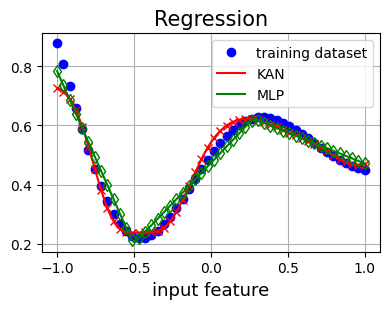

In [ ]:
import matplotlib.pyplot as plt # import the matplotlib library and assign it to the alias 'plt'

# Define the color_plots dictionary
color_plots = {
    'dataset': 'blue',  # Example color for the dataset
    'kan': 'red',       # Example color for KAN
    'mlp': 'green'      # Example color for MLP
}

# Regression on training data
fig, ax = plt.subplots(figsize=(4,3.2))
x_plot = np.linspace(x_train[0], x_train[-1], 1000).reshape(-1, 1)
ax.plot(x_train, y_train, 'o', color=color_plots['dataset'], label='training dataset')
ax.plot(x_plot, [kan_1d(x) for x in x_plot], color=color_plots['kan'], label='KAN')
ax.plot(x_train, [kan_1d(x) for x in x_train], 'x', color=color_plots['kan'], fillstyle='none')
ax.plot(x_plot, [mlp_1d(x) for x in x_plot], color=color_plots['mlp'], label='MLP')
ax.plot(x_train, [mlp_1d(x) for x in x_train], 'd', color=color_plots['mlp'], fillstyle='none')
ax.set_xlabel('input feature', fontsize=13)
ax.set_title('Regression', fontsize=15)
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()
#fig.savefig(folder_fig + 'regr1D.png', dpi=500)

Las predicciones para KAN se muestran en rojo, y en verde para MLP.
 Se puede observar que las curvas para KAN varian de forma más compleja, esto se debe a las funciones de borde (B-splines). La convergencia en KAN se obtuvo más rápido que para MLP, esto se puede observar en la siguiente imagen:

 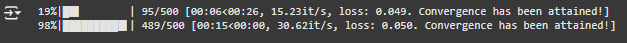

#### Ejemplo 2
A continuación se presenta un problema de ***regresión 2D*** (se tienen dos entradas) un poco más complejo. Los valores de salida se calculan al evaluar la función en cada punto de la malla.

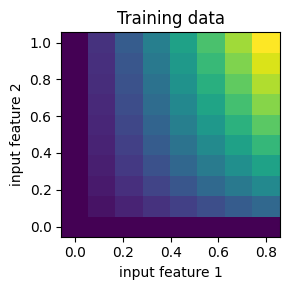

In [ ]:

def fun2d(X1, X2):
    return X1 * np.power(X2, .5)

X1, X2 = np.meshgrid(np.linspace(0, .8, 8), np.linspace(0, 1, 10))
Y_training = fun2d(X1, X2)

x_train2d = np.concatenate((X1.reshape(-1, 1), X2.reshape(-1, 1)), axis=1)
y_train2d = Y_training.reshape(-1, 1)

f, a = plt.subplots(figsize=(3,3))
a.set_xlabel('input feature 1')
a.set_ylabel('input feature 2')
a.pcolor(X1, X2, Y_training)
a.set_title('Training data')
f.tight_layout()
plt.show()

El mapa de calor anterior representa las dependencias entre las características ***x1*** y ***x2***.
Se entrena la red KAN y MLP.

In [ ]:
n_iter_train_2d = 500
loss_tol_2d = .1
seed = 476

#KAN
kan_2d = FeedForward([2, 2, 1],  # layer size
                  eps=.02,  # gradient descent parameter
                  n_weights_per_edge=10,  # n. edge functions
                  neuron_class=NeuronKAN,
                  x_bounds=[-1, 1],  # input domain bounds
                  get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                  seed=seed,
                  weights_range=[-1, 1])
kan_2d.train(x_train2d,
          y_train2d,
          n_iter_max=n_iter_train_2d,
          loss_tol=loss_tol_2d)

#MLP
mlp_2d = FeedForward([2, 6, 1],  # layer size
                     eps=.0025,  # gradient descend parameter
                     activation=relu,  # activation type (ReLU, tanh or sigmoid)
                     neuron_class=NeuronNN,
                     seed=seed,
                     weights_range=[-.1, .1])
mlp_2d.train(x_train2d,
             y_train2d,
             n_iter_max=n_iter_train_2d,
             loss_tol=loss_tol_2d)

100%|██████████| 500/500 [00:13<00:00, 35.91it/s, loss: 0.349]


El siguiente bloque es para la visualización de los resultados.

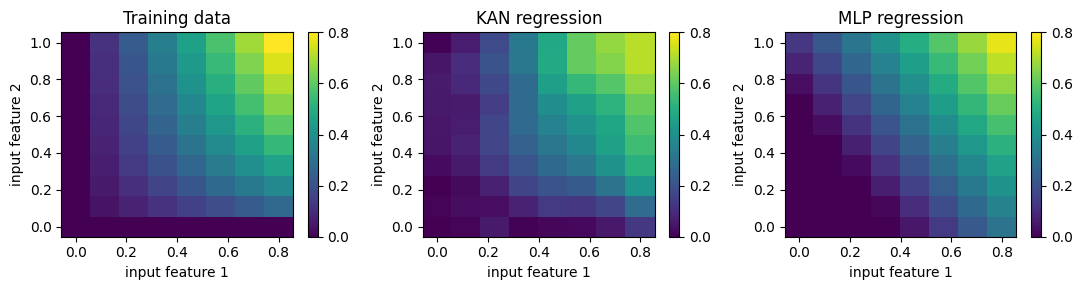

In [ ]:
Y_kan = np.array([kan_2d(xx) for xx in x_train2d])
Y_mlp = np.array([mlp_2d(xx) for xx in x_train2d])

f, a = plt.subplots(1, 3, figsize=(11,3))

vmin, vmax = min(Y_training.flatten()), max(Y_training.flatten())

im0 = a[0].pcolor(X1, X2, Y_training, vmin=vmin, vmax=vmax)
f.colorbar(im0, ax=a[0])
a[0].set_title('Training data')
a[0].set_xlabel('input feature 1')
a[0].set_ylabel('input feature 2')

im1 = a[1].pcolor(X1, X2, Y_kan.reshape(X1.shape), vmin=vmin, vmax=vmax)
f.colorbar(im1, ax=a[1])
a[1].set_title('KAN regression')
a[1].set_xlabel('input feature 1')
a[1].set_ylabel('input feature 2')

im2 = a[2].pcolor(X1, X2, Y_mlp.reshape(X1.shape), vmin=vmin, vmax=vmax)
f.colorbar(im2, ax=a[2])
a[2].set_title('MLP regression')
a[2].set_xlabel('input feature 1')
a[2].set_ylabel('input feature 2')

f.tight_layout()
plt.show()
# f.savefig(folder_fig + 'regr2D.png', dpi=500)

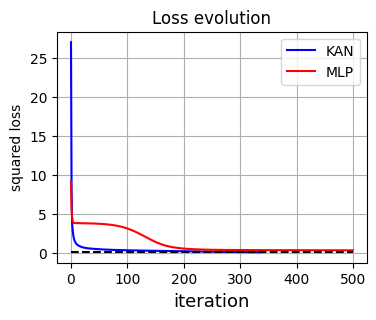

In [ ]:
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.plot(kan_2d.loss_hist, '-', color=color_plots['kan'], label='KAN')
ax1.plot(mlp_2d.loss_hist, '-', color=color_plots['mlp'], label='MLP')
ax1.plot(loss_tol_2d * np.ones(max(len(mlp_2d.loss_hist), len(kan_2d.loss_hist))), '--k')
ax1.grid()
ax1.set_ylabel('squared loss')
ax1.set_xlabel('iteration', fontsize=13)
ax1.legend()
ax1.set_title('Loss evolution')
plt.show()

Como se puede observar en la imagen generada,  un mapa de calor para los datos de entrenamiento originales y los valores predichos por los modelos KAN y MLP.
*   Training data: Representa los valores reales de la función objetivo.
*   KAN regression: Muestra la predicción de la red KAN, que ajusta los datos con gran precisión.
*   MLP regression: Muestra la predicción del MLP, que también sigue la tendencia general pero puede ser menos preciso en regiones complejas.

Se puede observar que KAN captura mejor las relaciones no lineales debido a las transformaciones no lineales. En MLP se observa una generalización más limitada. Además, KAN alcanzó la convergencia más rapido que MLP.

#### Ejemplo 3
Se concluye con un problema de ***clasificación en el conjunto de datos en forma de media luna de scikit-learn***. Los datos se observan en el gráfico posterior, coloreados referentes a la clase a la que pertenecen.

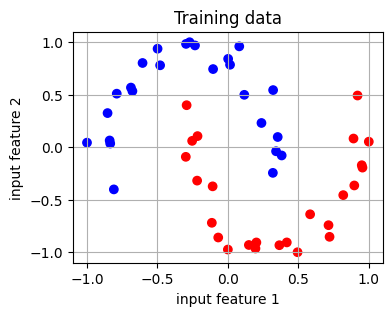

In [ ]:
from sklearn import datasets

n_samples = 50
noise = 0.1
x_train_cl, y_train_cl = datasets.make_moons(n_samples=n_samples, noise=noise)
# normalize between -1 and 1
x_train_cl[:, 0] = (x_train_cl[:, 0] - min(x_train_cl[:, 0])) / max(x_train_cl[:, 0] - min(x_train_cl[:, 0])) * 2 - 1
x_train_cl[:, 1] = (x_train_cl[:, 1] - min(x_train_cl[:, 1])) / max(x_train_cl[:, 1] - min(x_train_cl[:, 1])) * 2 - 1

fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax.set_xlabel('input feature 1')
ax.set_ylabel('input feature 2')
ax.grid()
ax.set_title("Training data")
plt.show()

A continuación se realiza el entrenamiento de los modelos MLP(dos capas ocultas de 10 neuronas cada una) y KAN (una capa de 2 neuronas). Para ambos se utiliza entropía cruzada como función de perdida ya que es un problema de clasificación.

In [ ]:
#parametros
n_iter_train_cl = int(1e3)
loss_tol_cl = 1.5
seed = 476

#MLP
mlp_cl = FeedForward([2, 10, 10, 2],  # layer size
                     eps=.01,  # gradient descend parameter
                     activation=tanh_act,  # activation type (relu, tanh_act or sigmoid_act)
                     neuron_class=NeuronNN,
                     loss=CrossEntropyLoss,
                     seed=seed,
                     weights_range=[-1, 1])
mlp_cl.train(x_train_cl,
             y_train_cl.reshape(-1, 1),
             n_iter_max=n_iter_train_cl,
             loss_tol=loss_tol_cl)

100%|██████████| 1000/1000 [00:43<00:00, 22.98it/s, loss: 6.420]


In [ ]:
#KAN
kan_cl = FeedForward([2, 2],  # layer size
                     eps=.02,  # gradient descent parameter
                     n_weights_per_edge=8,  # n. edge functions
                     neuron_class=NeuronKAN,
                     loss=CrossEntropyLoss,
                     x_bounds=[-1, 1],  # input domain bounds
                     get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                     seed=seed,
                     weights_range=[-1, 1])
kan_cl.train(x_train_cl,
             y_train_cl.reshape(-1, 1),
             n_iter_max=n_iter_train_cl,
             loss_tol=loss_tol_cl)

100%|██████████| 1000/1000 [00:34<00:00, 28.65it/s, loss: 6.871]


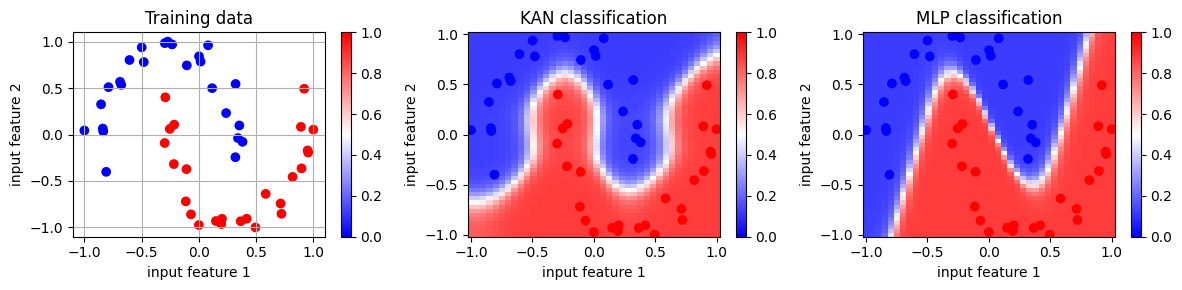

In [ ]:
#plot
def softmax(vec):
    return np.exp(vec) / sum(np.exp(vec))

X1_cl, X2_cl = np.meshgrid(np.linspace(-1, 1, 40), np.linspace(-1, 1, 50))
x_cl = np.concatenate((X1_cl.reshape(-1, 1), X2_cl.reshape(-1, 1)), axis=1)

Y_kan_cl = np.array([softmax(kan_cl(x))[1] for x in x_cl]).reshape(X1_cl.shape)
Y_mlp_cl = np.array([softmax(mlp_cl(x))[1] for x in x_cl]).reshape(X1_cl.shape)

fig_cl, ax_cl = plt.subplots(1, 3, figsize=(12,3))
# vmin, vmax = min(Y_training.flatten()), max(Y_training.flatten())

ax_cl[0].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax_cl[0].grid()
ax_cl[0].set_title('Training data')
ax_cl[0].set_xlabel('input feature 1')
ax_cl[0].set_ylabel('input feature 2')

im0 = ax_cl[1].pcolor(X1_cl, X2_cl, Y_kan_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[1].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax_cl[1].set_title('KAN classification')
ax_cl[1].set_xlabel('input feature 1')
ax_cl[1].set_ylabel('input feature 2')

im1 = ax_cl[2].pcolor(X1_cl, X2_cl, Y_mlp_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[2].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax_cl[2].set_title('MLP classification')
ax_cl[2].set_xlabel('input feature 1')
ax_cl[2].set_ylabel('input feature 2')

fig_cl.colorbar(im1, ax=ax_cl[0])
fig_cl.colorbar(im1, ax=ax_cl[1])
fig_cl.colorbar(im1, ax=ax_cl[2])
fig_cl.tight_layout()
plt.show()
# fig_cl.savefig(folder_fig + 'classification.png', dpi=500)

Se observan los datos de entrenamiento mediante un mapa de calior que ilustra la probabilidad asignada por los modelos para cada clase en el dominio. Los puntos representan los datos de entrenamiento y se observa cómo ambos modelos trazan los límites de decisión.
Se observa que KAN puede capturar patrones más complejos debido a sus transformaciones basadas en B-splines, tal como ha ocurrido en los ejemplos anteriores.

## Item 2. Modificación y Comparación de Resultados


### Ejemplo 1

Para este apartado se realiza el ejemplo de regresión, comparando con el realizado por el tutorial mediante la creación de un ejemplo de regresión para datos con una distribución compleja y otra lineal.

En este proceso, se generan datos con una distribución cúbica con ruido introducido para observar cómo los modelos KAN y MLP responden a estos datos. Posteriormente se observan tres gráficos: Los datos generados sobre el eje $x$ e $y$, Las curvas generadas por el modelo por sobre los datos, y la evolución del valor de LOSS para ambos modelos mediante las iteraciones de entrenamiento.

100%|██████████| 500/500 [00:15<00:00, 31.41it/s, loss: 8.284]


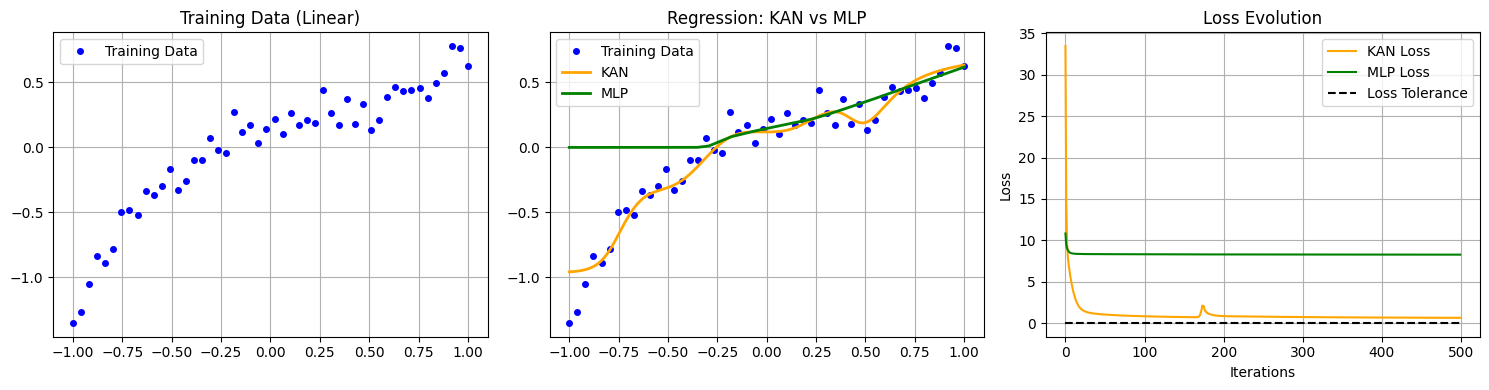

In [ ]:
# @title Datos con tendencia cúbica y entrenamiento.
import numpy as np
import matplotlib.pyplot as plt

# Colores para gráficos
color_plots = {'dataset': 'blue', 'kan': 'orange', 'mlp': 'green'}

# Generar un nuevo conjunto de datos (distribución polinómica con ruido)
np.random.seed(42)
x_train = np.linspace(-1, 1, 50).reshape(-1, 1)
y_train = 0.8 * (x_train**3) - 0.5 * (x_train**2) + 0.3 * x_train + 0.2  # función cúbica
y_train += 0.1 * np.random.normal(size=y_train.shape)  # agregar ruido

# Parámetros de entrenamiento
n_iter_train_1d = 500
loss_tol_1d = 0.05
seed = 476

# Entrenamiento de KAN
kan_1d = FeedForward(
    [1, 2, 2, 1],  # tamaño de capas
    eps=0.01,  # parámetro de descenso de gradiente
    n_weights_per_edge=7,  # número de funciones por conexión
    neuron_class=NeuronKAN,
    x_bounds=[-1, 1],  # límites del dominio de entrada
    get_edge_fun=get_bsplines,  # tipo de funciones de borde (B-splines o Chebyshev)
    seed=seed,
    weights_range=[-1, 1]
)
kan_1d.train(x_train, y_train, n_iter_max=n_iter_train_1d, loss_tol=loss_tol_1d)

# Entrenamiento de MLP
mlp_1d = FeedForward(
    [1, 13, 1],  # tamaño de capas
    eps=0.005,  # parámetro de descenso de gradiente
    activation=relu,  # tipo de activación (ReLU, tanh o sigmoide)
    neuron_class=NeuronNN,
    seed=seed,
    weights_range=[-0.5, 0.5]
)
mlp_1d.train(x_train, y_train, n_iter_max=n_iter_train_1d, loss_tol=loss_tol_1d)



# Crear los gráficos
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Primer gráfico: Datos de entrenamiento
ax[0].plot(x_train, y_train, 'o', color=color_plots['dataset'], markersize=4, label='Training Data')
ax[0].set_title('Training Data (Linear)')
ax[0].grid()
ax[0].legend()

# Segundo gráfico: Resultados KAN vs MLP
x_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)  # puntos para predicciones
y_kan_pred = np.array([kan_1d(x) for x in x_plot])  # predicción con KAN
y_mlp_pred = np.array([mlp_1d(x) for x in x_plot])  # predicción con MLP

ax[1].plot(x_train, y_train, 'o', color=color_plots['dataset'], markersize=4, label='Training Data')  # Reducir tamaño de los puntos
ax[1].plot(x_plot, y_kan_pred, '-', color=color_plots['kan'], linewidth=2, label='KAN')  # Aumentar grosor de la línea
ax[1].plot(x_plot, y_mlp_pred, '-', color=color_plots['mlp'], linewidth=2, label='MLP')  # Aumentar grosor de la línea
ax[1].set_title('Regression: KAN vs MLP')
ax[1].grid()
ax[1].legend()

# Tercer gráfico: Evolución del loss
ax[2].plot(kan_1d.loss_hist, '-', color=color_plots['kan'], linewidth=1.5, label='KAN Loss')
ax[2].plot(mlp_1d.loss_hist, '-', color=color_plots['mlp'], linewidth=1.5, label='MLP Loss')
ax[2].plot(loss_tol_1d * np.ones(max(len(mlp_1d.loss_hist), len(kan_1d.loss_hist))), '--k', label='Loss Tolerance')
ax[2].set_title('Loss Evolution')
ax[2].set_xlabel('Iterations')
ax[2].set_ylabel('Loss')
ax[2].grid()
ax[2].legend()

# Ajustar el diseño
fig.tight_layout()
plt.show()

Para los datos generados, se observa que el modelo KAN representa de manera más precisa los datos en comparación al modelo MLP. Algo interesante a analizar es que KAN inicia con un Loss elevado, pero este valor decrece rápidamente a mayor cantidad de iteraciones de entrenamiento, alcanzando una precisión significativamente mejor que la obtenida por MLP.

Esto se explica por la forma en que ambos algoritmos procesan los datos. KAN utiliza las funciónes borde (b-spline), lo que le permite representar relaciones más complejas y no lineales entre las entradas, por lo que el modelo se ajusta mejor a esta distribución de los datos, a diferencia de MLP aproxima las relaciones de los datos con funciones más simples, observando así la relación de los datos con forma lineal hecha por MLP menos representativa de los datos.

Se presenta la siguiente imagen, la cual son los resultados obtenidos del entrenamiento para el primer ejemplo de regresión realizado en el tutorial con el fin de su posterior comparación y análisis.

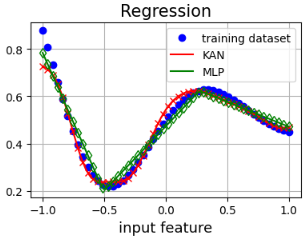

Al observar los datos obtenidos en el ejemplo 1 del tutorial, se aprecia un caso muy similar al comentado recientemente. Si bien ambos alcanzaron una convergencia adecuada para el valor de loss (Loss = 0,05), MLP tardo más iteraciones en alcanzar esta convergencia. Para ambas distribuciones complejas de los datos generados se obtuvo una mejora en el valor de LOSS más rapida para KAN que para MLP. Nuevamente se entiende que esto puede deberse a la capacidad de KAN de detectar comportamientos complejos en los datos, donde para ambos ejemplos obtuvo una forma con curvas más suaves y para MLP un comportamiento lineal.

De ambos ejemplos se puede entender que KAN no solo es más eficiente en la cantidad de iteraciones necesarias para converger al valor definido de loss, si no que también demuestra mayor capacidad para ajustarse a distribuciones complejas. De aquí surge la siguiente pregunta:

**¿KAN es mejor que MLP en todo tipo de distribución de datos?**


Para responder a lo anterior, se genera un ejemplo con una distribución lineal $y = 2x+1$, con ruido introducido.

100%|██████████| 500/500 [00:16<00:00, 31.02it/s, loss: 8.284]


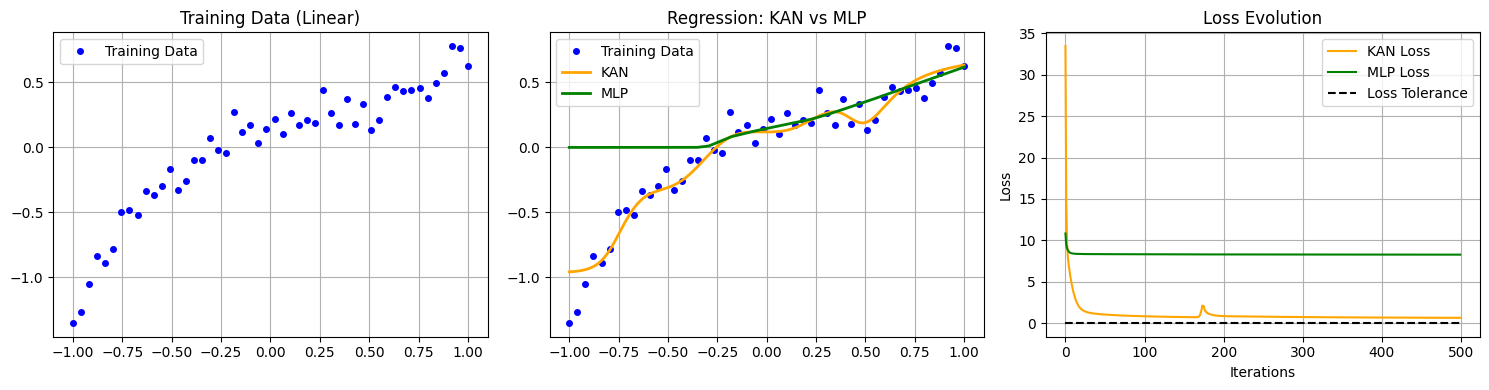

In [ ]:
# @title Datos con tendencia cúbica y entrenamiento.
import numpy as np
import matplotlib.pyplot as plt

# Colores para gráficos
color_plots = {'dataset': 'blue', 'kan': 'orange', 'mlp': 'green'}

# Generar un nuevo conjunto de datos (distribución polinómica con ruido)
np.random.seed(42)
x_train = np.linspace(-1, 1, 50).reshape(-1, 1)
y_train = 0.8 * (x_train**3) - 0.5 * (x_train**2) + 0.3 * x_train + 0.2  # función cúbica
y_train += 0.1 * np.random.normal(size=y_train.shape)  # agregar ruido

# Parámetros de entrenamiento
n_iter_train_1d = 500
loss_tol_1d = 0.05
seed = 476

# Entrenamiento de KAN
kan_1d = FeedForward(
    [1, 2, 2, 1],  # tamaño de capas
    eps=0.01,  # parámetro de descenso de gradiente
    n_weights_per_edge=7,  # número de funciones por conexión
    neuron_class=NeuronKAN,
    x_bounds=[-1, 1],  # límites del dominio de entrada
    get_edge_fun=get_bsplines,  # tipo de funciones de borde (B-splines o Chebyshev)
    seed=seed,
    weights_range=[-1, 1]
)
kan_1d.train(x_train, y_train, n_iter_max=n_iter_train_1d, loss_tol=loss_tol_1d)

# Entrenamiento de MLP
mlp_1d = FeedForward(
    [1, 13, 1],  # tamaño de capas
    eps=0.005,  # parámetro de descenso de gradiente
    activation=relu,  # tipo de activación (ReLU, tanh o sigmoide)
    neuron_class=NeuronNN,
    seed=seed,
    weights_range=[-0.5, 0.5]
)
mlp_1d.train(x_train, y_train, n_iter_max=n_iter_train_1d, loss_tol=loss_tol_1d)



# Crear los gráficos
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Primer gráfico: Datos de entrenamiento
ax[0].plot(x_train, y_train, 'o', color=color_plots['dataset'], markersize=4, label='Training Data')
ax[0].set_title('Training Data (Linear)')
ax[0].grid()
ax[0].legend()

# Segundo gráfico: Resultados KAN vs MLP
x_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)  # puntos para predicciones
y_kan_pred = np.array([kan_1d(x) for x in x_plot])  # predicción con KAN
y_mlp_pred = np.array([mlp_1d(x) for x in x_plot])  # predicción con MLP

ax[1].plot(x_train, y_train, 'o', color=color_plots['dataset'], markersize=4, label='Training Data')  # Reducir tamaño de los puntos
ax[1].plot(x_plot, y_kan_pred, '-', color=color_plots['kan'], linewidth=2, label='KAN')  # Aumentar grosor de la línea
ax[1].plot(x_plot, y_mlp_pred, '-', color=color_plots['mlp'], linewidth=2, label='MLP')  # Aumentar grosor de la línea
ax[1].set_title('Regression: KAN vs MLP')
ax[1].grid()
ax[1].legend()

# Tercer gráfico: Evolución del loss
ax[2].plot(kan_1d.loss_hist, '-', color=color_plots['kan'], linewidth=1.5, label='KAN Loss')
ax[2].plot(mlp_1d.loss_hist, '-', color=color_plots['mlp'], linewidth=1.5, label='MLP Loss')
ax[2].plot(loss_tol_1d * np.ones(max(len(mlp_1d.loss_hist), len(kan_1d.loss_hist))), '--k', label='Loss Tolerance')
ax[2].set_title('Loss Evolution')
ax[2].set_xlabel('Iterations')
ax[2].set_ylabel('Loss')
ax[2].grid()
ax[2].legend()

# Ajustar el diseño
fig.tight_layout()
plt.show()

100%|██████████| 500/500 [00:17<00:00, 28.72it/s, loss: 4.424]


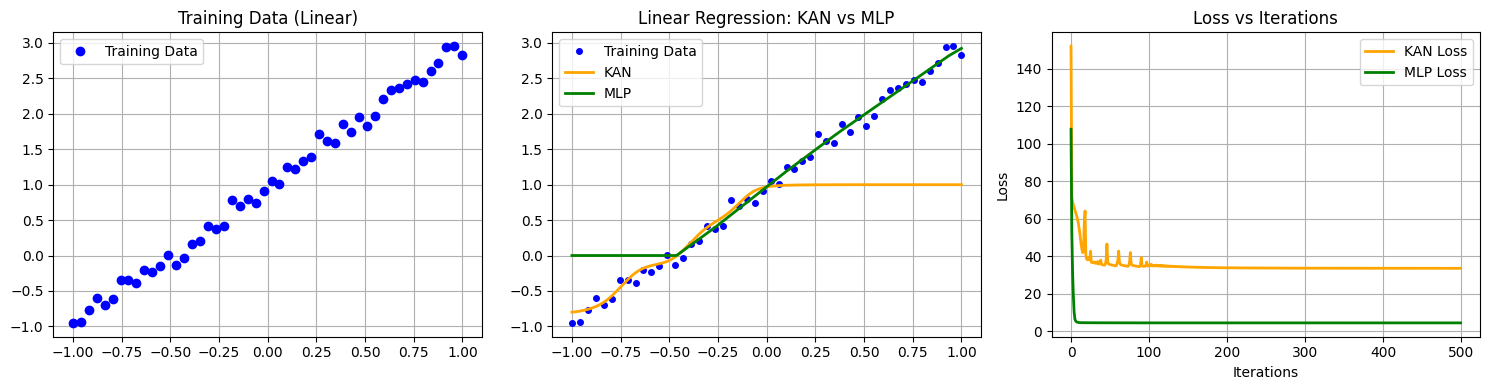

In [ ]:
# @title Datos con distribución lineal
import numpy as np
import matplotlib.pyplot as plt

# Colores para gráficos
color_plots = {'dataset': 'blue', 'kan': 'orange', 'mlp': 'green'}

# Generar datos lineales con ruido
np.random.seed(42)
x_train_linear = np.linspace(-1, 1, 50).reshape(-1, 1)  # 50 puntos entre -1 y 1
y_train_linear = 2 * x_train_linear + 1  # y = 2x + 1
y_train_linear += 0.1 * np.random.normal(size=y_train_linear.shape)  # agregar ruido

# Parámetros de entrenamiento
n_iter_train_linear = 500
loss_tol_linear = 0.05
seed = 476

# Entrenamiento de KAN
kan_linear = FeedForward(
    [1, 2, 2, 1],  # tamaño de capas
    eps=0.01,  # parámetro de descenso de gradiente
    n_weights_per_edge=7,  # número de funciones por conexión
    neuron_class=NeuronKAN,
    x_bounds=[-1, 1],  # límites del dominio de entrada
    get_edge_fun=get_bsplines,  # tipo de funciones de borde (B-splines o Chebyshev)
    seed=seed,
    weights_range=[-1, 1]
)
kan_linear.train(x_train_linear, y_train_linear, n_iter_max=n_iter_train_linear, loss_tol=loss_tol_linear)

# Entrenamiento de MLP
mlp_linear = FeedForward(
    [1, 13, 1],  # tamaño de capas
    eps=0.005,  # parámetro de descenso de gradiente
    activation=relu,  # tipo de activación (ReLU, tanh o sigmoide)
    neuron_class=NeuronNN,
    seed=seed,
    weights_range=[-0.5, 0.5]
)
mlp_linear.train(x_train_linear, y_train_linear, n_iter_max=n_iter_train_linear, loss_tol=loss_tol_linear)


# Visualizar los datos y los resultados en una fila de gráficos
fig, ax = plt.subplots(1, 3, figsize=(15, 4))  # Crear una figura con 3 subgráficos uno al lado del otro

# Primer gráfico: Visualización de los datos de entrenamiento
ax[0].plot(x_train_linear, y_train_linear, 'o', color=color_plots['dataset'], label='Training Data')
ax[0].set_title('Training Data (Linear)')
ax[0].grid()
ax[0].legend()

# Segundo gráfico: Resultados KAN vs MLP
x_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)  # puntos para predicciones
y_kan_pred = np.array([kan_linear(x) for x in x_plot])  # predicción con KAN
y_mlp_pred = np.array([mlp_linear(x) for x in x_plot])  # predicción con MLP

# Ajustar tamaño de los puntos de entrenamiento y grosor de las líneas
ax[1].plot(x_train_linear, y_train_linear, 'o', color=color_plots['dataset'], markersize=4, label='Training Data')  # Reducir tamaño de los puntos
ax[1].plot(x_plot, y_kan_pred, '-', color=color_plots['kan'], linewidth=2, label='KAN')  # Aumentar grosor de la línea
ax[1].plot(x_plot, y_mlp_pred, '-', color=color_plots['mlp'], linewidth=2, label='MLP')  # Aumentar grosor de la línea
ax[1].set_title('Linear Regression: KAN vs MLP')
ax[1].grid()
ax[1].legend()

# Tercer gráfico: Comportamiento del Loss vs Iteraciones
ax[2].plot(range(len(kan_linear.loss_hist)), kan_linear.loss_hist, color=color_plots['kan'], label='KAN Loss', linewidth=2)
ax[2].plot(range(len(mlp_linear.loss_hist)), mlp_linear.loss_hist, color=color_plots['mlp'], label='MLP Loss', linewidth=2)
ax[2].set_title('Loss vs Iterations')
ax[2].set_xlabel('Iterations')
ax[2].set_ylabel('Loss')
ax[2].grid()
ax[2].legend()

# Ajustar el diseño
fig.tight_layout()
plt.show()



En este caso, KAN no ofrece ventajas significativas a diferencia de los casos presentados anteriormente. MLP genera una mejor representación gracias a su arquitectura más simple, siendo capaz de ajustarse con mayor precisión a la tendencia lineal de los datos.

 Como KAN introduce una complejidad adicional, su representación tiende a agregar curvas o patrones innecesario debido al uso de las funciones borde. Esto se puede observar en el gráfico, donde a partir del punto x1=0, desvía su forma del comportamiento esperado de los datos. Esto resulta en una perdida adicional y un loss con un valor mucho más alto que el obtenido para MLP.

  En base al gráfico loss vs Iterations observado, MLP tiene un Loss mejor que KAN para muchas iteraciones, además de una rápida convergencia del valor de pérdida, solidificando lo fundamentado anteriormente.

  Otra observación a realizar es que MLP no toma valores negativos para $y$, esto puede deberse a la función de activación RelU utilizada, la cual toma los valores negativos como 0 a lo largo de la propagación hacia adelante.



### Ejemplo 2
Para este segundo apartado se realiza el ejemplo de regresión 2D, comparandolo con el realizado en el tutorial junto con los nuevos datos de entrenamiento utilizando distribución lineal.

Este código genera una visualización completa de los datos y resultados obtenidos al aplicar los modelos KAN y MLP sobre un conjunto de datos distribuidos linealmente.

El código siguiente genera datos distribuidos linealmente. Se les aplica KAN y MLP para su posterior comparación con el Ejemplo 2 del tutorial. Se presentan cuatro gráficos: los datos de generados, las predicciones realizadas por el modelo KAN, las predicciones del modelo MLP y la evolución de la pérdida ante iteraciones del entrenamiento de ambos modelos.

Dado que para el ejemplo 1 ya se realizaron ejemplos de regresión ante datos con distribución compleja y lineal, en este apartado se hace hincapié unicamente en la regresión con datos distribuidos linealmente para su posterior comparación con el ejemplo de regresión con datos complejamente distribuidos del tutorial.



 55%|█████▌    | 275/500 [00:08<00:07, 30.61it/s, loss: 0.010. Convergence has been attained!]


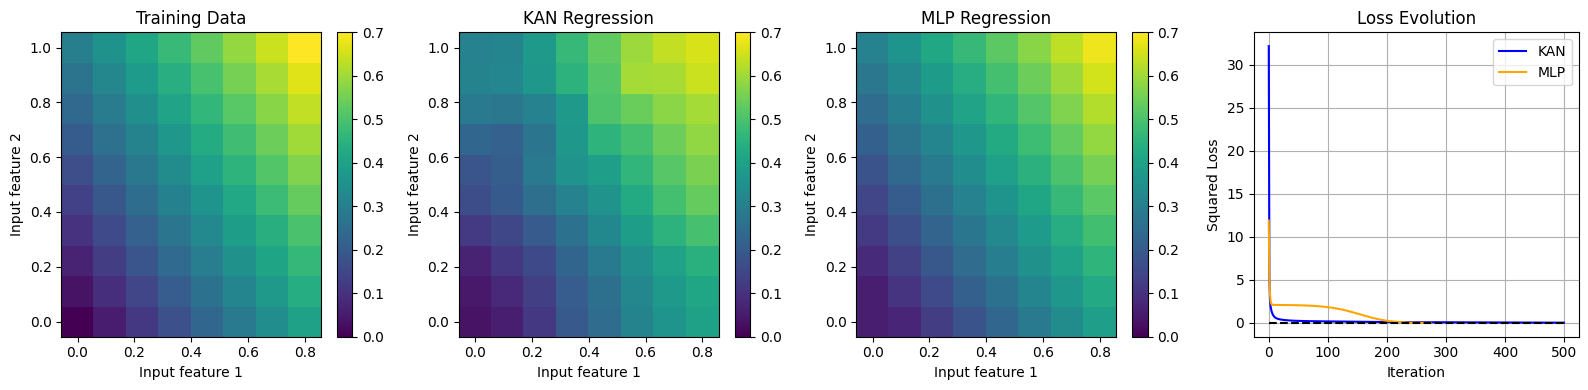

In [ ]:
# @title Datos con distribución lineal y aplicación de MLP y KAN.
import numpy as np
import matplotlib.pyplot as plt

# Cambiamos la función para generar una distribución lineal
def fun2d_linear(X1, X2):
    return 0.5 * X1 + 0.3 * X2

X1, X2 = np.meshgrid(np.linspace(0, .8, 8), np.linspace(0, 1, 10))
Y_training = fun2d_linear(X1, X2)

x_train2d = np.concatenate((X1.reshape(-1, 1), X2.reshape(-1, 1)), axis=1)
y_train2d = Y_training.reshape(-1, 1)

# Parámetros de entrenamiento
n_iter_train_2d = 500
loss_tol_2d = 0.01
seed = 476

# KAN con datos lineales
kan_2d = FeedForward(
    [2, 2, 1],  # tamaño de las capas
    eps=0.02,  # parámetro de gradiente
    n_weights_per_edge=10,  # funciones por arista
    neuron_class=NeuronKAN,
    x_bounds=[-1, 1],  # límites del dominio
    get_edge_fun=get_bsplines,  # funciones de base (B-splines)
    seed=seed,
    weights_range=[-1, 1]
)
kan_2d.train(
    x_train2d,
    y_train2d,
    n_iter_max=n_iter_train_2d,
    loss_tol=loss_tol_2d
)

# MLP con datos lineales para comparación
mlp_2d = FeedForward(
    [2, 6, 1],  # tamaño de las capas
    eps=0.0025,  # parámetro de gradiente
    activation=relu,  # tipo de activación
    neuron_class=NeuronNN,
    seed=seed,
    weights_range=[-0.1, 0.1]
)
mlp_2d.train(
    x_train2d,
    y_train2d,
    n_iter_max=n_iter_train_2d,
    loss_tol=loss_tol_2d
)


# Código del bloque 2 (Gráficos de los resultados)
Y_kan = np.array([kan_2d(xx) for xx in x_train2d])
Y_mlp = np.array([mlp_2d(xx) for xx in x_train2d])

# Crear una figura para concatenar las imágenes
fig_concat, axs_concat = plt.subplots(1, 4, figsize=(16, 4))  # 4 gráficos lado a lado

# Gráfico 1: Training Data (Bloque 1)
vmin, vmax = min(Y_training.flatten()), max(Y_training.flatten())
im0 = axs_concat[0].pcolor(X1, X2, Y_training, vmin=vmin, vmax=vmax, shading='auto')
fig_concat.colorbar(im0, ax=axs_concat[0])
axs_concat[0].set_title('Training Data')
axs_concat[0].set_xlabel('Input feature 1')
axs_concat[0].set_ylabel('Input feature 2')

# Gráfico 2: KAN regression (Bloque 2)
im1 = axs_concat[1].pcolor(X1, X2, Y_kan.reshape(X1.shape), vmin=vmin, vmax=vmax, shading='auto')
fig_concat.colorbar(im1, ax=axs_concat[1])
axs_concat[1].set_title('KAN Regression')
axs_concat[1].set_xlabel('Input feature 1')
axs_concat[1].set_ylabel('Input feature 2')

# Gráfico 3: MLP regression (Bloque 2)
im2 = axs_concat[2].pcolor(X1, X2, Y_mlp.reshape(X1.shape), vmin=vmin, vmax=vmax, shading='auto')
fig_concat.colorbar(im2, ax=axs_concat[2])
axs_concat[2].set_title('MLP Regression')
axs_concat[2].set_xlabel('Input feature 1')
axs_concat[2].set_ylabel('Input feature 2')

# Gráfico 4: Loss evolution (Bloque 3)
axs_concat[3].plot(kan_2d.loss_hist, '-', label='KAN', color='blue')  # Ajusta color según tu esquema
axs_concat[3].plot(mlp_2d.loss_hist, '-', label='MLP', color='orange')  # Ajusta color según tu esquema
axs_concat[3].plot(loss_tol_2d * np.ones(max(len(mlp_2d.loss_hist), len(kan_2d.loss_hist))), '--k')
axs_concat[3].grid()
axs_concat[3].set_ylabel('Squared Loss')
axs_concat[3].set_xlabel('Iteration')
axs_concat[3].legend()
axs_concat[3].set_title('Loss Evolution')

# Ajustar y mostrar todo
fig_concat.tight_layout()
plt.show()

# Si deseas guardar el gráfico completo concatenado
# fig_concat.savefig('combined_graphics.png', dpi=300)



En el gráfico de Loss v/s iteraciones se pude observar a simple vista un mejor comportamiento de KAN sobre MLP para las primeras iteraciones, ya que la curva de loss de KAN está por debajo de la de KAN para el primer rango de iteraciones. Sin embargo, se puede observar que la convergencia del valor de LOSS para MLP se alcanzó con mayor velocidad que para KAN, por lo que se puede entender que, a partir de cierta cantidad de iteraciones MLP funciona mucho mejor para datos con este tipo de distribución.

Aún así, KAN se adaptó adecuadamente a la relación lineal. La salida es consistente con lo esperado y el valor de LOSS es considerablemente bajo y aceptable.

Al igual que para el ejemplo 1, MLP obtuvo mejor rendimiento sobre datos con distribución lineal que KAN, mientras que KAN tiene mejor rendimiento sobre datos con distribución compleja que MLP.

### Ejemplo 3

Para este apartado se realiza el ejemplo de clasificación con datos generados (primero con una relación entre los datos compleja y luego una lineal) y se compara el resultado obtenido en KAN-MLP y también con el resultado obtenido en el ejemplo 3 de clasificación del tutorial.

A continuación se generaron datos de entrenamiento con una distribución compleja, específicamente círculos concéntricos con un nivel moderado de ruido, para evaluar la capacidad de dos modelos (KAN y MLP) en resolver problemas de clasificación no lineal. La idea es que los modelos identifiquen los dos grupos generados, donde cada uno pertenece a distintas regiones de los circulos cocéntricos.
Ambos modelos fueron entrenados utilizando estos datos y se generaron gráficos para analizar su desempeño: Los datos generados sobre el plano $(x,y)$, las predicciones realizadas por cada modelo (KAN y MLP) destacando las regiones clasificadas según las probabilidades asignadas, y la evolución de la pérdida (loss) durante el proceso de entrenamiento. Estos resultados permiten comparar visualmente cómo cada modelo ajusta su capacidad de clasificación a una estructura más compleja y cómo evolucionan hacia la convergencia durante el entrenamiento.

100%|██████████| 1000/1000 [01:27<00:00, 11.49it/s, loss: 15.573]


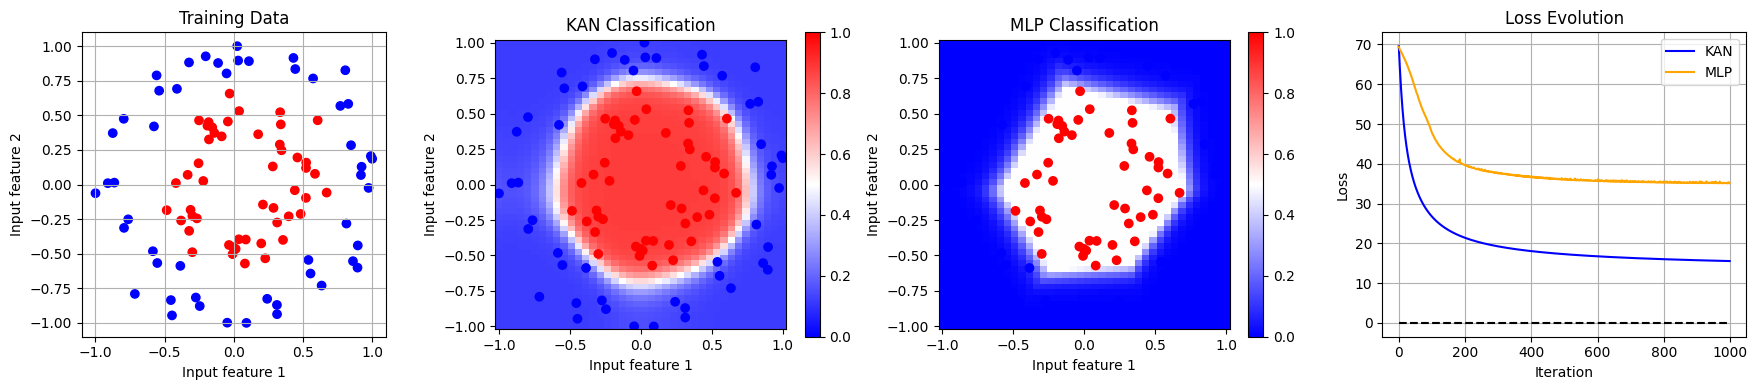

In [ ]:
# @title Ejemplo de clasificación con datos con distribución compleja.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Definición de la función softmax
def softmax(z):
    e_z = np.exp(z - np.max(z))  # Estabilidad numérica
    return e_z / e_z.sum(axis=-1, keepdims=True)

# Crear nuevos datos con una forma diferente (círculos)
n_samples = 100
noise = 0.12
x_train_cl, y_train_cl = datasets.make_circles(n_samples=n_samples, noise=noise, factor=0.5)

# Normalizar entre -1 y 1
x_train_cl[:, 0] = (x_train_cl[:, 0] - min(x_train_cl[:, 0])) / max(x_train_cl[:, 0] - min(x_train_cl[:, 0])) * 2 - 1
x_train_cl[:, 1] = (x_train_cl[:, 1] - min(x_train_cl[:, 1])) / max(x_train_cl[:, 1] - min(x_train_cl[:, 1])) * 2 - 1

# Parámetros
n_iter_train_cl = int(1e3)
loss_tol_cl = 0.01
seed = 476

# Crear la malla de puntos de prueba en el rango [-1, 1]
X1_cl, X2_cl = np.meshgrid(np.linspace(-1, 1, 40), np.linspace(-1, 1, 50))
x_cl = np.concatenate((X1_cl.reshape(-1, 1), X2_cl.reshape(-1, 1)), axis=1)

# MLP
mlp_cl = FeedForward([2, 5, 2],  # layer size
                     eps=.01,  # gradient descend parameter
                     activation=relu,  # activation type (relu, tanh_act or sigmoid_act)
                     neuron_class=NeuronNN,
                     loss=CrossEntropyLoss,
                     seed=seed,
                     weights_range=[-0.5, 0.5])
mlp_cl.train(x_train_cl,
             y_train_cl.reshape(-1, 1),
             n_iter_max=n_iter_train_cl,
             loss_tol=loss_tol_cl)

# KAN
kan_cl = FeedForward([2, 2],  # layer size
                     eps=.01,  # gradient descent parameter
                     n_weights_per_edge=8,  # n. edge functions
                     neuron_class=NeuronKAN,
                     loss=CrossEntropyLoss,
                     x_bounds=[-1, 1],  # input domain bounds
                     get_edge_fun=get_bsplines,  # edge function type (B-splines or Chebyshev)
                     seed=seed,
                     weights_range=[-0.5, 0.5])
kan_cl.train(x_train_cl,
             y_train_cl.reshape(-1, 1),
             n_iter_max=n_iter_train_cl,
             loss_tol=loss_tol_cl)

# Paso 1: Visualizar datos de entrenamiento
fig_concat, axs_concat = plt.subplots(1, 4, figsize=(18, 4))

# Datos de entrenamiento (círculos concéntricos)
axs_concat[0].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
axs_concat[0].set_xlabel('Input feature 1')
axs_concat[0].set_ylabel('Input feature 2')
axs_concat[0].set_title('Training Data')
axs_concat[0].set_aspect('equal')
axs_concat[0].grid()

# Clasificación KAN
Y_kan_cl = np.array([softmax(kan_cl(x))[1] for x in x_cl]).reshape(X1_cl.shape)
im0 = axs_concat[1].pcolor(X1_cl, X2_cl, Y_kan_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
axs_concat[1].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
axs_concat[1].set_xlabel('Input feature 1')
axs_concat[1].set_ylabel('Input feature 2')
axs_concat[1].set_title('KAN Classification')
axs_concat[1].set_aspect('equal')
fig_concat.colorbar(im0, ax=axs_concat[1])

# Clasificación MLP
Y_mlp_cl = np.array([softmax(mlp_cl(x))[1] for x in x_cl]).reshape(X1_cl.shape)
im1 = axs_concat[2].pcolor(X1_cl, X2_cl, Y_mlp_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
axs_concat[2].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
axs_concat[2].set_xlabel('Input feature 1')
axs_concat[2].set_ylabel('Input feature 2')
axs_concat[2].set_title('MLP Classification')
axs_concat[2].set_aspect('equal')
fig_concat.colorbar(im1, ax=axs_concat[2])

# Evolución de la pérdida
axs_concat[3].plot(kan_cl.loss_hist, label='KAN', color='blue')
axs_concat[3].plot(mlp_cl.loss_hist, label='MLP', color='orange')
axs_concat[3].plot(loss_tol_cl * np.ones(max(len(mlp_cl.loss_hist), len(kan_cl.loss_hist))), '--k')
axs_concat[3].set_xlabel('Iteration')
axs_concat[3].set_ylabel('Loss')
axs_concat[3].set_title('Loss Evolution')
axs_concat[3].legend()
axs_concat[3].grid()

# Ajustar y mostrar
fig_concat.tight_layout()
plt.show()

# Guardar el gráfico completo concatenado si es necesario
# fig_concat.savefig('combined_classification_results.png', dpi=300)


De los resultados se obtiene el comportamiento esperado, donde KAN obtiene una mejor respuesta ante la distribución dada de los datos. Al observar la gráfica de Loss v/s Iteraciones, se observa que KAN tiene menor pérdida ante MLP para este problema. Esto se debe a la mejor representación de los datos por parte de KAN, el cual en base a funciones de activación spline se obtiene una mayor flexibilidad y suavidad en las curvas generadas. Esto permite manejar problemas complejos y no lineales, como se observa en la figura redonda de la región.

MLP logra distinguir la clase del grupo azul, pero la clase del grupo rojo se representa por un área blanca, lo que indica que el modelo tiene baja confianza para clasificar los datos de tal clase, y además se genera una región de decisión que tiene bordes rígidos y angulares. Esto, y los valores de LOSS altos, refuerza la idea de que MLP no representa precisamente datos con una distribución compleja.

A continuación se presenta el ejemplo 3 realizado por el tutorial, que aborda un problema muy similar pero ante una distribución distinta de los datos.

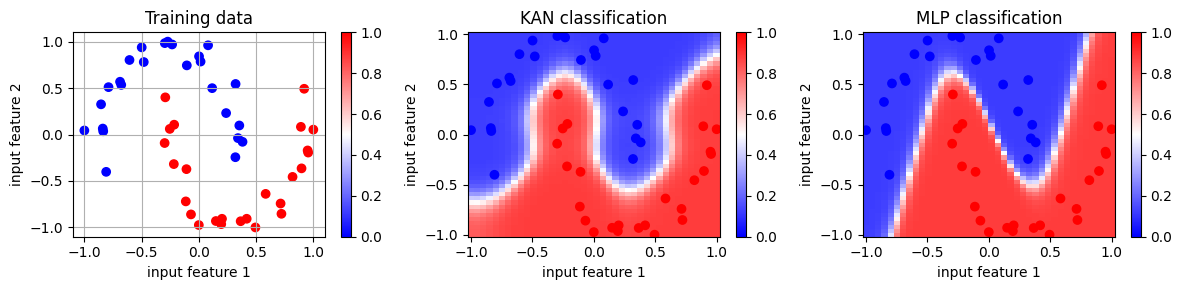

Ambos ejemplos de clasificación de datos con una distribución no lineal, teniendo mejor desempeño para KAN. Esto refuerza una vez más que KAN captura mejor las relaciones no lineales. Aún así, para este ejemplo MLP si logró adaptarse adecuadamente a la distribución de los datos a pesar de no tener una distribución lineal. Esto se debe principalmente a los distintos parámetros utilizados, ya que se usaron distintas funciones de activación (Tangente hiperbólica para el ejemplo del tutorial y ReLU para el ejemplo generado con los circulos cocéntricos) además de la cantidad de capas y neuronas en la red.

En el siguiente bloque de código se busca realizar un ejemplo para clasificación con una distribución lineal de los datos con el fin de observar el comportamiento de ambos modelos. Se generan dos grupos de datos que son linealmente separables en el espacio. Se entrenan con ambos modelos y se comparan posteriormente.


100%|██████████| 500/500 [01:08<00:00,  7.30it/s, loss: 30.250]


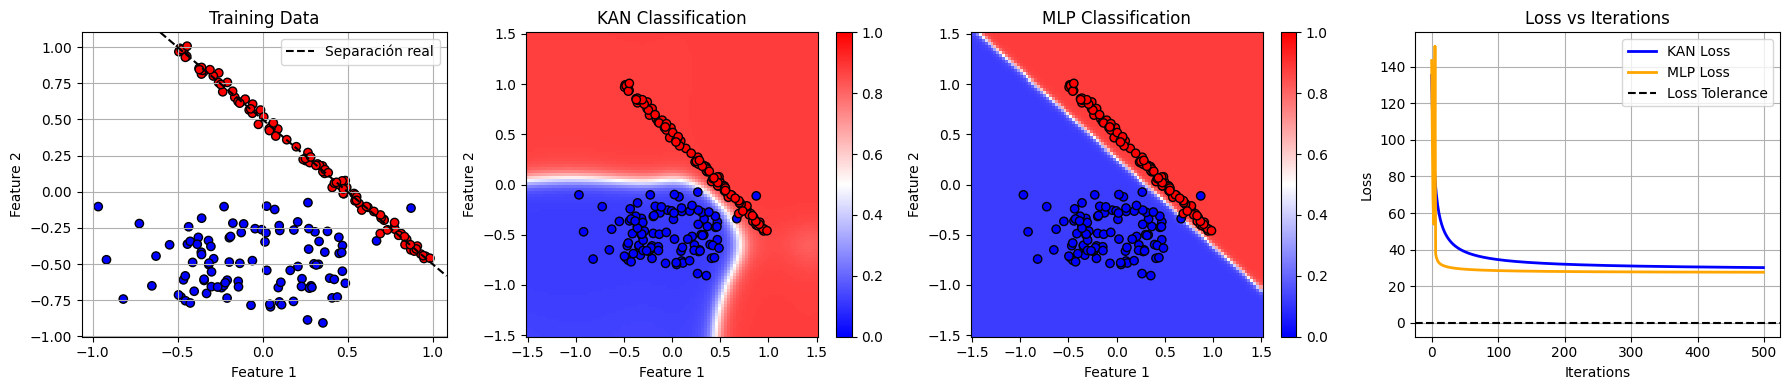

In [ ]:
# @title Ejemplo con datos con una distribución lineal para clasificación.
import numpy as np
import matplotlib.pyplot as plt

# Generar datos replicando la distribución de la imagen
def generate_refined_data(n_samples, noise_level=0.05, seed=42):
    """
    Genera un problema de clasificación con puntos azules concentrados,
    pero con algunos dispersos alrededor.

    Parameters:
        - n_samples: Total de puntos (se dividirá entre las dos clases).
        - noise_level: Nivel de ruido para simular variabilidad real.
        - seed: Semilla para reproducibilidad.

    Returns:
        - X: Array de características (n_samples, 2).
        - y: Etiquetas de clase (0 o 1).
    """
    np.random.seed(seed)

    # Dividir el número de muestras entre las dos clases
    n_blue = n_samples // 2
    n_red = n_samples - n_blue

    # Generar puntos azules (concentrados en un centro)
    center_x1 = np.random.uniform(-0.5, 0.5, int(0.8 * n_blue))  # 80% en el centro
    center_x2 = np.random.uniform(-0.8, -0.2, int(0.8 * n_blue))  # Más concentrados
    outer_x1 = np.random.uniform(-1, 1, int(0.2 * n_blue))  # 20% más dispersos
    outer_x2 = np.random.uniform(-1, 0, int(0.2 * n_blue))  # Más alejados

    x1_blue = np.concatenate((center_x1, outer_x1))
    x2_blue = np.concatenate((center_x2, outer_x2))

    # Generar puntos rojos (distribuidos cerca de la línea divisoria)
    x1_red = np.random.uniform(-0.5, 1, n_red)
    x2_red = -x1_red + 0.5 + np.random.normal(0, noise_level, n_red)  # Alrededor de la línea

    # Etiquetas
    y_blue = np.zeros(n_blue, dtype=int)
    y_red = np.ones(n_red, dtype=int)

    # Unir datos
    X_blue = np.vstack((x1_blue, x2_blue)).T
    X_red = np.vstack((x1_red, x2_red)).T
    X = np.vstack((X_blue, X_red))
    y = np.concatenate((y_blue, y_red))

    return X, y

# Generar datos
n_samples = 200
noise_level = 0.03
x_train_cl, y_train_cl = generate_refined_data(n_samples, noise_level=noise_level)

# Parámetros de entrenamiento
n_iter_train_cl = int(500)
loss_tol_cl = 0.01
seed = 42

# MLP
mlp_cl = FeedForward(
    [2, 3, 2],
    eps=0.02,
    activation=tanh_act,
    neuron_class=NeuronNN,
    loss=CrossEntropyLoss,
    seed=seed,
    weights_range=[-0.5, 0.5]
)

mlp_cl.train(x_train_cl, y_train_cl.reshape(-1, 1), n_iter_max=n_iter_train_cl, loss_tol=loss_tol_cl)

# KAN
kan_cl = FeedForward(
    [2, 2],  # Tamaño de las capas
    eps=0.01,  # Gradiente descendente
    n_weights_per_edge=8,  # Número de funciones de borde
    neuron_class=NeuronKAN,
    loss=CrossEntropyLoss,
    x_bounds=[-1, 1],  # Límites de entrada
    get_edge_fun=get_bsplines,
    seed=seed,
    weights_range=[-0.5, 0.5]
)

kan_cl.train(x_train_cl, y_train_cl.reshape(-1, 1), n_iter_max=n_iter_train_cl, loss_tol=loss_tol_cl)

# Crear malla para evaluar modelos
X1_cl, X2_cl = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
x_cl = np.concatenate((X1_cl.reshape(-1, 1), X2_cl.reshape(-1, 1)), axis=1)

# Predicciones para visualización
def softmax(vec):
    exp_vec = np.exp(vec - np.max(vec))
    return exp_vec / np.sum(exp_vec)

Y_kan_cl = np.array([softmax(kan_cl(x))[1] for x in x_cl]).reshape(X1_cl.shape)
Y_mlp_cl = np.array([softmax(mlp_cl(x))[1] for x in x_cl]).reshape(X1_cl.shape)

# Graficar los resultados en una fila
fig, ax = plt.subplots(1, 4, figsize=(18, 4))

# Datos originales
ax[0].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr, edgecolor="k")
ax[0].axline((0, 0.5), slope=-1, color="black", linestyle="--", label="Separación real")
ax[0].set_title("Training Data")
ax[0].legend()
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[0].grid()

# Clasificación KAN
im0 = ax[1].pcolor(X1_cl, X2_cl, Y_kan_cl, cmap=plt.cm.bwr, shading='auto', vmin=0, vmax=1)
ax[1].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr, edgecolor="k")
ax[1].set_title("KAN Classification")
fig.colorbar(im0, ax=ax[1])
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

# Clasificación MLP
im1 = ax[2].pcolor(X1_cl, X2_cl, Y_mlp_cl, cmap=plt.cm.bwr, shading='auto', vmin=0, vmax=1)
ax[2].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr, edgecolor="k")
ax[2].set_title("MLP Classification")
fig.colorbar(im1, ax=ax[2])
ax[2].set_xlabel("Feature 1")
ax[2].set_ylabel("Feature 2")

# Pérdida vs Iteraciones
ax[3].plot(kan_cl.loss_hist, label='KAN Loss', color='blue', linewidth=2)
ax[3].plot(mlp_cl.loss_hist, label='MLP Loss', color='orange', linewidth=2)
ax[3].axhline(y=loss_tol_cl, color='black', linestyle='--', label='Loss Tolerance')
ax[3].set_title("Loss vs Iterations")
ax[3].set_xlabel("Iterations")
ax[3].set_ylabel("Loss")
ax[3].legend()
ax[3].grid()

plt.tight_layout()
plt.show()


Aquí se puede observar un mejor comportamiento para MLP que para KAN en este problema que se diseñó para que la región de clasificación sea lineal y no compleja. En el gráfico de Loss v/s Iterations se puede observar una mayor precisión para MLP que para KAN, pero de igual manera pasado cierto rango de iteraciones, el modelo KAN logra entender la relación esperada para este modelo pero con menor velocidad que MLP.
Ambos modelos lograron capturar una región de clasificacón adecuada.

Al comparar los tres ejercicios presentes de clasificación se entiende que KAN tiene mejor comportamiento al clasificar datos con una relación de distribución compleja, a diferencia de MLP que tiene mayor precisión al clasificar datos que se distribuyen de manera lineal.

###**Discusión General**
En relación con el primer ejercicio, el modelo KAN sobresale por su capacidad para abordar problemas de clasificación con relaciones no lineales complejas. Este desempeño subraya su potencial en aplicaciones donde los datos presentan patrones difíciles de separar con modelos lineales o arquitecturas menos flexibles.

En el segundo ejercicio, al igual que en el primero, KAN se destaca como la opción más eficaz. Su habilidad para representar distribuciones no lineales altamente complejas, como las estructuras concéntricas, demuestra su superioridad frente al modelo MLP. Mientras que KAN consigue capturar estas geometrías de manera precisa, la MLP presenta limitaciones evidentes al enfrentarse a datos de este tipo, mostrando una menor capacidad de adaptación a patrones complejos.

##Item 3. Análisis y Explicación de la Arquitectura

La arquitectura **Kolmogorov-Arnold Networks** (*KAN*) se basa en el teorema de Kolmogorov-Arnold, que asegura que **cualquier función continua de múltiples variables puede descomponerse en una suma de funciones univariables compuestas**. Este principio permite construir redes neuronales capaces de aproximar cualquier función con alta precisión, aprovechando una combinación de transformaciones no lineales y estructuras diferenciables.

### Construcción de la Arquitectura
La implementación de la arquitectura KAN incluye los siguientes elementos principales:

1. ***Neuronas KAN (NeuronKAN):*** Estas neuronas amplían el concepto básico de una neurona tradicional al incorporar funciones llamadas **funciones de borde (edge functions)**. Las funciones de borde, como los *B-splines*, transforman las entradas de manera no lineal antes de ser ponderadas por los pesos y combinadas en la salida intermedia (xmid). Finalmente, la salida intermedia pasa por una función de activación, como tanh, para generar la salida final (xout).

2. ***Funciones de borde (B-splines):*** Son funciones diferenciables que segmentan el espacio de entrada en regiones, permitiendo una representación flexible de relaciones no lineales. Estas funciones se ajustan automáticamente durante el entrenamiento para optimizar la capacidad de modelado de las neuronas.

3. ***Capas completamente conectadas:*** Una capa consiste en un conjunto de NeuronKAN conectadas a través de pesos. Esta estructura permite transformar las entradas en representaciones más abstractas en las siguientes capas.

4. ***Cálculo de pérdida y retropropagación:*** La **pérdida** se calcula usando métricas como el error cuadrático medio (SquaredLoss) o entropía cruzada (CrossEntropyLoss). La **retropropagación** se encarga de actualizar los pesos a través del cálculo de gradientes, utilizando las derivadas exactas de las funciones de borde y de activación.

5. ***Proceso de entrenamiento:*** El modelo se entrena mediante el método de descenso de gradiente, optimizando los pesos de cada capa para minimizar la pérdida global en un conjunto de datos.

### Funcionamiento de KAN
El flujo de trabajo de una KAN incluye dos fases principales:

1. ***Transformación de entrada (Funciones de borde):*** Cada entrada pasa por una transformación no lineal usando funciones de borde, como los B-splines. Estas funciones segmentan el espacio de entrada y permiten una representación flexible de las relaciones entre las variables.

2. ***Ponderación y combinación:*** Las salidas de las funciones de borde son ponderadas por un conjunto de pesos asociados. Estas combinaciones ponderadas generan una salida intermedia (xmid) en cada neurona.

3. ***Función de activación:*** La salida intermedia es procesada por una función de activación (e.g., tanh), que introduce no linealidad en el modelo y permite manejar relaciones complejas entre las variables.

4. ***Cálculo de la salida final:*** La salida de cada capa pasa a la siguiente, continuando el procesamiento hasta obtener la salida final de la red. Este flujo permite transformar las entradas originales en representaciones cada vez más abstractas.

5. ***Retropropagación y aprendizaje:*** Durante el entrenamiento, el modelo calcula la diferencia entre las predicciones y las etiquetas reales (función de pérdida). Los gradientes se calculan y propagan hacia atrás, ajustando los pesos de cada neurona para minimizar la pérdida.



Las redes de Kolmogorov-Arnold (KAN) se han mostrado prometedoras en diversos campos debido a su capacidad para modelar relaciones complejas y no lineales con menos parámetros que las redes neuronales tradicionales. He aquí algunos casos de uso clave:
- **Modelización científica y ajuste de datos**
- **Resolución de ecuaciones diferenciales parciales (EDP)**
- **Regresión simbólica**

### Ventajas y Desventajas de las KAN
Las ventajas que posee esta arquitectura, mejoran las limitaciones de las redes convencionales:
- ***Interpretabilidad***: A diferencia de los modelos tradicionales de aprendizaje profundo, los KAN proporcionan una estructura más interpretable. Las funciones aprendibles pueden visualizarse y analizarse, ofreciendo información sobre el proceso de toma de decisiones del modelo. Esta característica es especialmente valiosa en los campos científicos, donde comprender el funcionamiento del modelo es tan crucial como lograr una gran precisión.
- ***Flexibilidad***: Las KAN no se limitan a un único tipo de función de activación. Aunque suelen utilizar B-splines, pueden emplearse otras funciones de base, como los polinomios de Chebyshev, en función de la tarea específica. Esta flexibilidad hace que la arquitectura sea versátil y adaptable a diversas aplicaciones.

Pero como cualquier tecnologia, vienen sus propias debilidades como:
- ***Complejidad computacional***: Uno de los retos de las KAN es su intensidad computacional durante la fase de entrenamiento. Como los KAN utilizan funciones de activación aprendibles en los bordes, la complejidad de la evaluación de estas funciones puede ralentizar considerablemente el proceso de entrenamiento en comparación con los MLP tradicionales. Esta complejidad se amplifica aún más en tareas que requieren arquitecturas KAN profundas o funciones base muy detalladas.
-***Necesidad de experiencia***: Implementar y ajustar las KAN puede ser más complejo que trabajar con MLP tradicionales. La selección de las funciones de base adecuadas (por ejemplo, B-splines, polinomios de Chebyshev) y la configuración del modelo para una tarea específica requieren una comprensión matemática más profunda y una mayor interacción entre el ser humano y el modelo. Esto puede hacer que las KAN sean menos accesibles para los profesionales sin conocimientos especializados.

### Analisis Detallados de los Resultados Obtenidos

#### Ejemplo 1: Regresión con Distribución Compleja y Lineal

KAN mostró una representación más precisa de los datos gracias a su capacidad de modelar relaciones no lineales utilizando funciones borde (b-spline).

Por otro lado, en las distribuciones lineales, MLP superó a KAN, mostrando una representación más precisa de la tendencia lineal de los datos.

Se destacan las ventajas de KAN en distribuciones complejas, KAN demostró mayor capacidad de representación debido a su flexibilidad y su habilidad para detectar comportamientos no lineales. Su convergencia más rápida para datos complejos reafirma su efectividad en escenarios donde la relación entre las variables no es trivial.

Mientras que sus limitaciones, demostro desventajas, principalmente debido a su tendencia a agregar patrones innecesarios que complicaron la representación de los datos.

#### Ejemplo 2: Regresión 2D

Para el ejemplo lineal KAN demostró un mejor comportamiento durante las primeras iteraciones. Esto se reflejó en la curva de pérdida, donde KAN mostró valores más bajos que MLP en el rango inicial. Sin embargo, a medida que avanzaron las iteraciones, MLP alcanzó la convergencia del valor de pérdida con mayor rapidez, logrando representar los datos lineales de forma precisa. Aunque KAN logró adaptarse adecuadamente a esta distribución, su mayor complejidad introdujo patrones innecesarios, resultando en un proceso de convergencia más lento.

Este ejemplo reafirma que KAN y MLP tienen puntos fuertes en diferentes contextos. KAN es más eficiente para datos con relaciones complejas y no lineales, mientras que MLP sobresale en escenarios donde los datos presentan distribuciones lineales claras. La elección entre ambos modelos debe estar guiada por la naturaleza de los datos a procesar y los objetivos del análisis.

#### Ejemplo 3: Clasificación con Datos Complejos

Una vez más los resultados confirman que **KAN supera a MLP en el escenario complejo**, logrando una mejor representación de los datos gracias a la flexibilidad de sus funciones spline. La gráfica de Loss v/s Iteraciones refuerza esta conclusión, mostrando que KAN alcanzó valores de pérdida más bajos que MLP a lo largo del entrenamiento.

MLP logró clasificar correctamente una de las clases para el ejemplo con datos distribuidos linealmente, pero presentó baja confianza en el problema complejo. Además, los bordes de decisión de MLP fueron rígidos y angulares, lo que refleja su **limitada capacidad para adaptarse a relaciones no lineales complejas**.

Se entiende con esto que ***KAN sobresale en problemas de clasificación con distribuciones complejas, mientras que MLP es más adecuado para clasificaciones lineales.*** Este comportamiento se alinea con lo observado en los ejercicios de regresión de los ejemplos anteriores. En particular, los resultados destacan cómo las propiedades de las funciones de activación (tangente hiperbólica en el tutorial y ReLU en el ejercicio de círculos concéntricos) influyen en la capacidad de los modelos para adaptarse a diferentes patrones.


En relación con los t*res ejercicios de clasificación*, se confirma que **KAN es la opción más eficaz para datos con relaciones complejas**, como estructuras concéntricas, **gracias a su capacidad de capturar patrones no lineales con mayor precisión**. Por otro lado, **MLP tiene un desempeño superior al enfrentar datos linealmente separables**, mostrando mayor rapidez y precisión en su convergencia.

En resumen, ***la elección del modelo debe basarse en la naturaleza de los datos y los requisitos del problema***, destacando la **flexibilidad de KAN y la eficiencia de MLP en sus respectivos dominios.**